In [2]:
# customize string representations of objects


class Person():
    def __init__(self):
        self.fname = "John"
        self.lname = "Doe"
        self.age = 25
    
    # overriding __repr__ and __str__ function
    # use __repr__ to create a string useful for debugging
    def __repr__(self):
        return "<Person Class - Firstname:{0}, Lastname:{1}, age:{2}>".format(self.fname, self.lname, self.age)

    # use str for a more human-readable string
    def __str__(self):
        return "Person ({0} {1} is {2})".format(self.fname, self.lname, self.age)

    # use bytes to convert the informal string to a bytes object
    def __bytes__(self):
        val = "Person:{0}:{1}:{2}".format(self.fname, self.lname, self.age)
        return bytes(val.encode('utf-8'))


def main():
    # create a new Person object
    cls1 = Person()

    # use different Python functions to convert it to a string
    print(repr(cls1))
    print(str(cls1))
    print("Formatted: {0}".format(cls1))
    print(bytes(cls1))


if __name__ == "__main__":
    main()

<Person Class - Firstname:John, Lastname:Doe, age:25>
Person (John Doe is 25)
Formatted: Person (John Doe is 25)
b'Person:John:Doe:25'


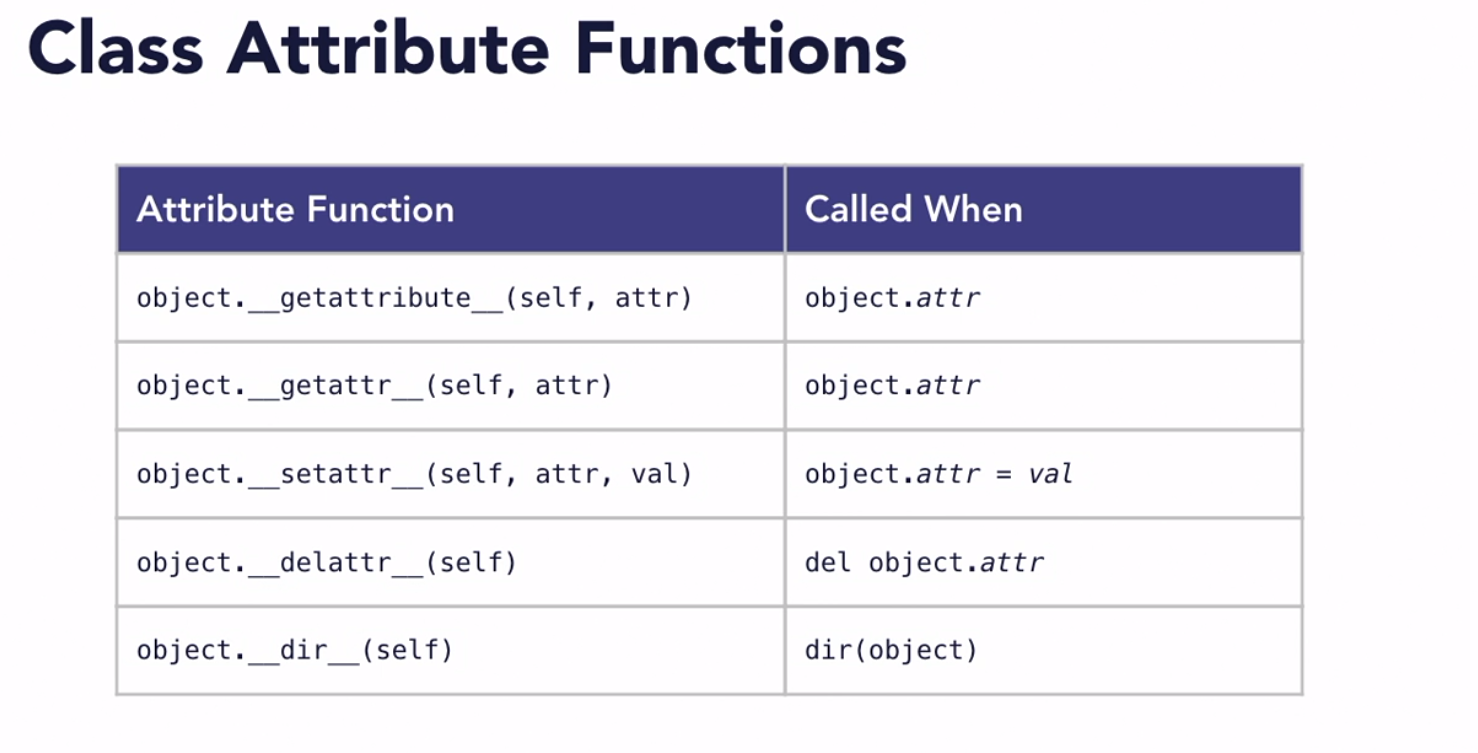

In [4]:
# customize attributes of objects


class myColor():
    def __init__(self):
        self.red = 50
        self.green = 75
        self.blue = 100

    # use getattr to dynamically return a value
    def __getattr__(self, attr):
        if attr == "rgbcolor":
            return (self.red, self.green, self.blue)
        elif attr == "hexcolor":
            return "#{0:02x}{1:02x}{2:02x}".format(self.red, self.green, self.blue)
        else:
            raise AttributeError

    # use setattr to dynamically return a value
    def __setattr__(self, attr, val):
        if attr == "rgbcolor":
            self.red = val[0]
            self.green = val[1]
            self.blue = val[2]
        else:
            super().__setattr__(attr, val)

    # use dir to list the available properties
    def __dir__(self):
        return ("rgbolor", "hexcolor")
    
"""
In Python, super() has two major use cases:

Allows us to avoid using the base class name explicitly
Working with Multiple Inheritance

class Mammal(object):
  def __init__(self, mammalName):
    print(mammalName, 'is a warm-blooded animal.')
    
class Dog(Mammal):
  def __init__(self):
    print('Dog has four legs.')
    super().__init__('Dog')
    
d1 = Dog()

Output
Dog has four legs.
Dog is a warm-blooded animal.

Here, we called the __init__() method of the Mammal class (from the Dog class) using code
super().__init__('Dog')

instead of
Mammal.__init__(self, 'Dog')
"""

def main():
    # create an instance of myColor
    cls1 = myColor()
    # print the value of a computed attribute
    print(cls1.rgbcolor)
    print(cls1.hexcolor)

    # set the value of a computed attribute
    cls1.rgbcolor = (125, 200, 86)
    print(cls1.rgbcolor)
    print(cls1.hexcolor)

    # access a regular attribute
    print(cls1.red)

    # list the available attributes
    print(dir(cls1))


if __name__ == "__main__":
    main()

(50, 75, 100)
#324b64
(125, 200, 86)
#7dc856
125
['hexcolor', 'rgbolor']


### Add numeric capabilities to custom class

Following functions are called when we try to do neumeric operation in python ( a + b, what is + for python?)

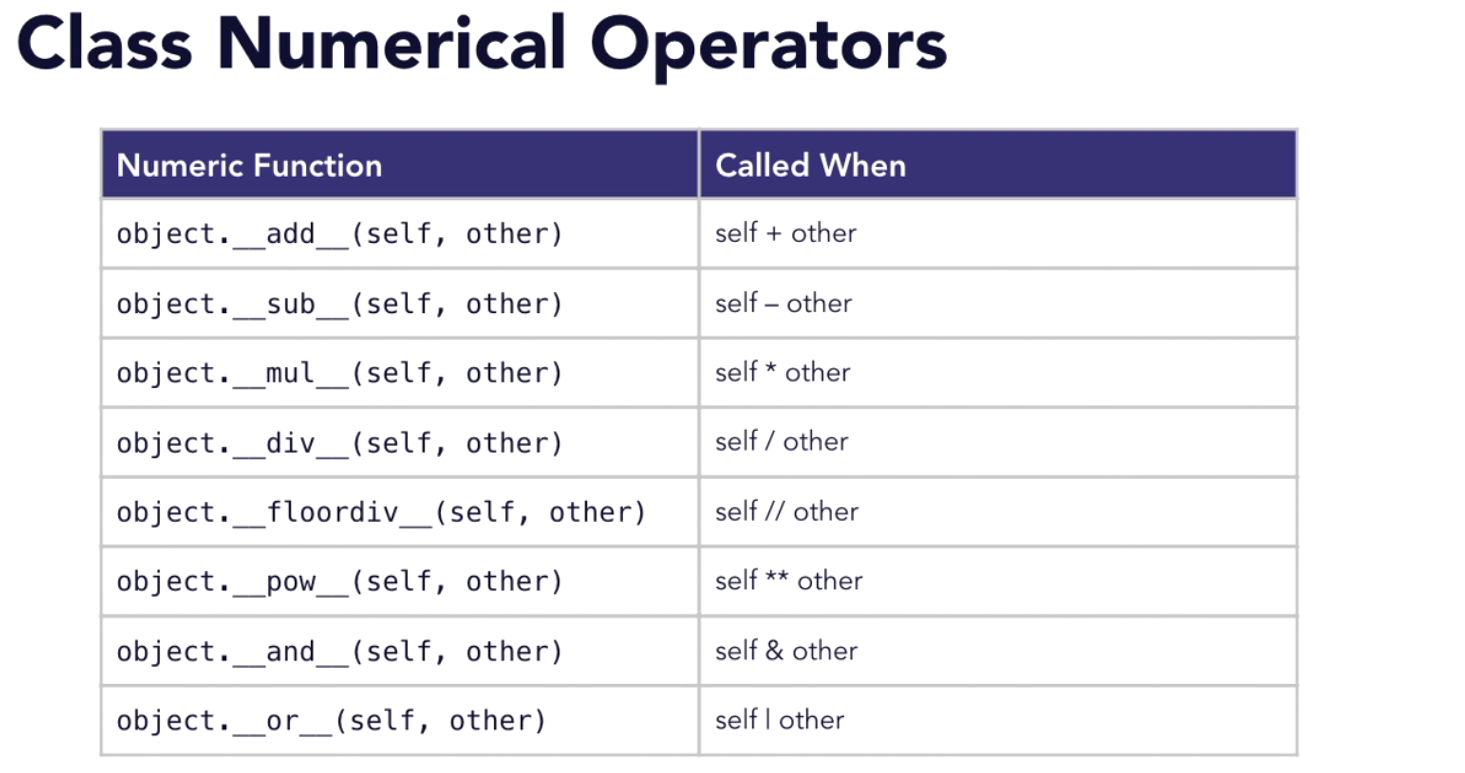
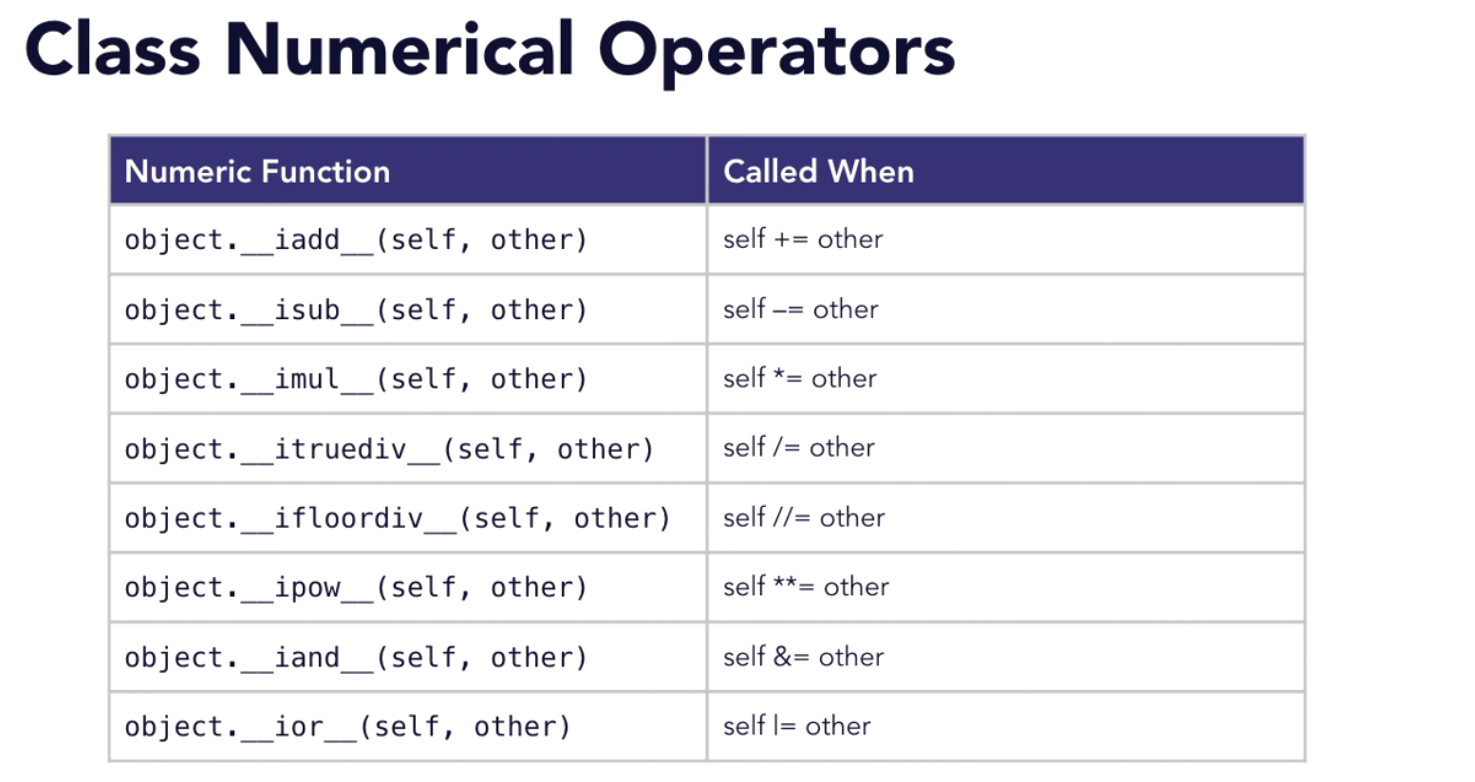

In [5]:
# give objects number-like behavior


class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return "<Point x:{0},y:{1}>".format(self.x, self.y)

    # implement addition
    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)

    # implement subtraction
    def __sub__(self, other):
        return Point(self.x - other.x, self.y - other.y)

    # implement in-place addition
    def __iadd__(self, other):
        self.x += other.x
        self.y += other.y
        return self


def main():
    # Declare some points
    p1 = Point(10, 20)
    p2 = Point(30, 30)
    print(p1, p2)

    # Add two points
    p3 = p1 + p2
    print(p3)

    # subtract two points
    p4 = p2 - p1
    print(p4)

    # Perform in-place addition
    p1 += p2
    print(p1)


if __name__ == "__main__":
    main()

<Point x:10,y:20> <Point x:30,y:30>
<Point x:40,y:50>
<Point x:20,y:10>
<Point x:40,y:50>
